<a href="https://colab.research.google.com/github/Jacobmunoz88/se-ales-y-sistemas/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Solucion del problema b #
Realizar la simulacion del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.



Codigo de la funcion cero y pendiente.

In [2]:
#función cero y pendiente
def my_ceropend(x,xhmax,xhmin):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b

  return xh

Codigo para la discretizacion y cuantizacion.

<ipython-input-12-89b27674cbb6>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


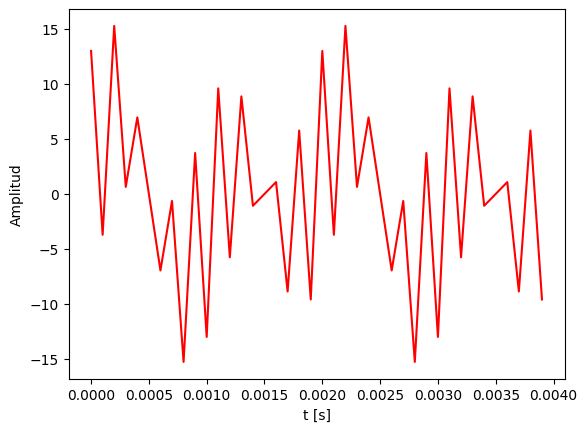

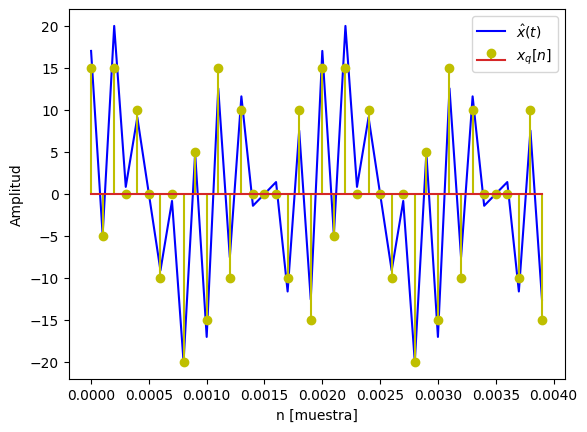

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Parámetros de muestreo
fs = 5000  # 5 kHz
Ts=1/fs
f= 500  # se uso esta frecuencia porque es la que tiene mayor N como se calculo en el PDF del componente teorico
T= 1/f


# Definir el intervalo de tiempo
t = np.arange(0,2*T, Ts/2) # se muestran 2 periodos

# Definir la señal continua x(t)
x= 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Muestrear la señal continua
xhmax = 20
xhmin = -20
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)

#cuantizar
nbits = 4 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'r',label='$x(t)$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='$\hat{x}(t)$')
plt.stem(t,xq,'y',label='$x_{q}[n]$')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Solucion del problema c #

Implemente una simulación para encontrar la salida del sistema lineal e invariante al tiempo $\mathcal{H}\{\cdot\}$, con respuesta al escalón $h_\epsilon[n]=\{2,4,1,5,0,10\}$, $n\in\mathbb{Z}$, ante la entrada análoga en corriente $x(t)=20(\cos(t/3)+\cos(t/4)) [A] $. A: Amperios.Incluya los acondicionamientos necesarios de discretización y cuantización, asumiendo un microprocesador de 4 bits con entrada análoga de 4mA a 20 mA.

Codigo para la discretizacion y cuantizacion.

<ipython-input-13-c01f87d3e065>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


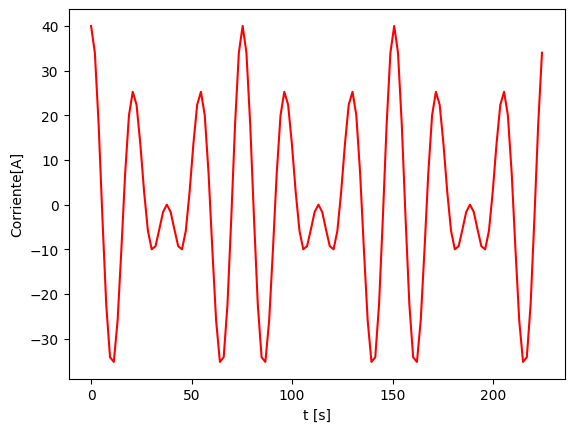

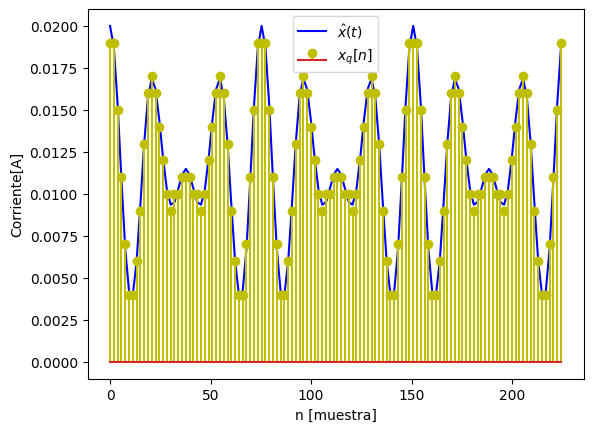

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 6*np.pi #perido señal 1
T2 = 8*np.pi #perido señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #perido cuasiperiódica, se calculo en el PDF de la componente teorica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4))
xhmax = 20*10**-3  #20mA
xhmin = 4*10**-3   #4mA
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 4mA a 20m
#asegurar vector columna

#cuantizar
nbits = 4 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

#señal cuantizada
xq = np.zeros(len(xh))
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'r',label='$x(t)$')
plt.xlabel('t [s]')
plt.ylabel('Corriente[A]')
plt.show()
plt.plot(t,xh,'b',label='$\hat{x}(t)$')
plt.stem(t,xq,'y',label='$x_{q}[n]$')
plt.xlabel('n [muestra]')
plt.ylabel('Corriente[A]')
plt.legend()
plt.show()

Teniendo la señal discretizada y cuantizada, se procede a encontrar la salida del SLIT aplicando la convolución entre la entrada digital y la respuesta impulso. Dado que tenemos la respuesta escalón, calculamos la respuesta impulso como:

$h[n] = {\rm{diff}}[h_\epsilon[n]] = h_\epsilon[n]-h_\epsilon[n-1]$

In [15]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit
print(h)

[ 2 -3  4 -5 10]


La salida del sistema se puede obtener entonces mediante la operación de convolución:

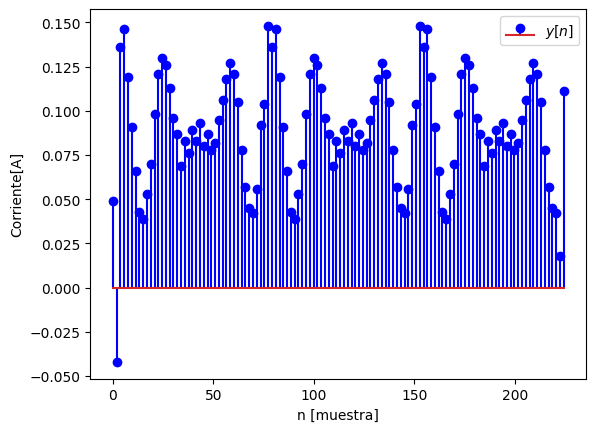

In [16]:
y = np.convolve(xq,h,mode='same')#respuesta del slit

#graficar señal
plt.stem(t,y,'b',label='$y[n]$')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Corriente[A]')
plt.show()